In [8]:
!pip install scikit-optimize

In [19]:
!pip install torch torchvision torchaudio

In [20]:
# ======================================
# 1. Import Libraries
# ======================================

In [21]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ExpSineSquared, DotProduct, RationalQuadratic, ConstantKernel
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from skopt import gp_minimize
from skopt.space import Real
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats.qmc import Sobol
from scipy.stats import norm

In [22]:
# ======================================
# 2. Add updated inputs for function-1
# ======================================

In [32]:
inputs8 = np.array([[0.60499445, 0.29221502, 0.90845275, 0.35550624, 0.20166872, 0.57533801, 0.31031095, 0.73428138],
       [0.17800696, 0.56622265, 0.99486184, 0.21032501, 0.32015266, 0.70790879, 0.63538449, 0.10713163],
       [0.00907698, 0.81162615, 0.52052036, 0.07568668, 0.26511183, 0.09165169, 0.59241515, 0.36732026],
       [0.50602816, 0.65373012, 0.36341078, 0.17798105, 0.0937283 , 0.19742533, 0.7558269 , 0.29247234],
       [0.35990926, 0.24907568, 0.49599717, 0.70921498, 0.11498719, 0.28920692, 0.55729515, 0.59388173],
       [0.77881834, 0.0034195 , 0.33798313, 0.51952778, 0.82090699, 0.53724669, 0.5513471 , 0.66003209],
       [0.90864932, 0.0622497 , 0.23825955, 0.76660355, 0.13233596, 0.99024381, 0.68806782, 0.74249594],
       [0.58637144, 0.88073573, 0.74502075, 0.54603485, 0.00964888, 0.74899176, 0.23090707, 0.09791562],
       [0.76113733, 0.85467239, 0.38212433, 0.33735198, 0.68970832, 0.30985305, 0.63137968, 0.04195607],
       [0.9849332 , 0.69950626, 0.9988855 , 0.18014846, 0.58014315, 0.23108719, 0.49082694, 0.31368272],
       [0.11207131, 0.43773566, 0.59659878, 0.59277563, 0.22698177, 0.41010452, 0.92123758, 0.67475276],
       [0.79188751, 0.57619134, 0.69452836, 0.28342378, 0.13675546, 0.27916186, 0.84276726, 0.62532792],
       [0.1435503 , 0.93741452, 0.23232482, 0.00904349, 0.41457893, 0.40932517, 0.55377852, 0.2058408 ],
       [0.76991655, 0.45875909, 0.55900044, 0.69460444, 0.50319902, 0.72834638, 0.78425353, 0.66313109],
       [0.05644741, 0.06595555, 0.02292868, 0.03878647, 0.40393544, 0.80105533, 0.48830701, 0.89308498],
       [0.86243745, 0.48273382, 0.2818694 , 0.54410223, 0.88749026, 0.38265469, 0.60190199, 0.47646169],
       [0.3515119 , 0.59006494, 0.9094363 , 0.67840835, 0.21282566, 0.08846038, 0.410153  , 0.19572429],
       [0.73590364, 0.03461189, 0.72803027, 0.14742652, 0.29574314, 0.44511731, 0.97517969, 0.37433978],
       [0.68029397, 0.25510465, 0.86218799, 0.13439582, 0.3263292 , 0.28790687, 0.43501048, 0.36420013],
       [0.04432925, 0.01358149, 0.25819824, 0.57764416, 0.05127992, 0.15856307, 0.59103012, 0.07795293],
       [0.77834548, 0.75114565, 0.31414221, 0.90298577, 0.33538166, 0.38632267, 0.74897249, 0.9887551 ],
       [0.89888711, 0.5236417 , 0.87678325, 0.21869645, 0.90026089, 0.28276624, 0.91107791, 0.47239822],
       [0.14512029, 0.11932754, 0.42088822, 0.38760861, 0.15542283, 0.87517163, 0.51055967, 0.72861058],
       [0.33895442, 0.56693202, 0.3767511 , 0.09891573, 0.65945169, 0.24554809, 0.76248278, 0.73215347],
       [0.17615002, 0.29396143, 0.97567997, 0.79393631, 0.92340076, 0.03084229, 0.80325452, 0.59589758],
       [0.02894663, 0.02827906, 0.48137155, 0.6131746 , 0.67266045, 0.02211341, 0.6014833 , 0.52488505],
       [0.19263987, 0.63067728, 0.41679584, 0.49052929, 0.79608602, 0.65456706, 0.27624119, 0.29551759],
       [0.94318502, 0.21885062, 0.72118408, 0.42459707, 0.986902  , 0.53518298, 0.71474318, 0.96009372],
       [0.5327214 , 0.8336926 , 0.071399  , 0.11681148, 0.73069311, 0.93737559, 0.86650798, 0.127902  ],
       [0.44709584, 0.84395253, 0.72954612, 0.63915138, 0.40928714, 0.13264569, 0.03590888, 0.44683847],
       [0.38222497, 0.55713584, 0.85310163, 0.33379569, 0.26572127, 0.48087292, 0.23764706, 0.76863196],
       [0.53281953, 0.86230848, 0.53826712, 0.04944293, 0.71970119, 0.9067059 , 0.10823094, 0.52534791],
       [0.39486519, 0.33180167, 0.7407543 , 0.69786172, 0.73740444, 0.78377681, 0.25449546, 0.87114551],
       [0.98594539, 0.87305363, 0.07039262, 0.05358729, 0.73415296, 0.52025852, 0.81104004, 0.10336036],
       [0.96457339, 0.97397979, 0.66375335, 0.66221599, 0.67312167, 0.90523762, 0.45887462, 0.5609175 ],
       [0.47207071, 0.16820264, 0.08642757, 0.45265551, 0.48061922, 0.62243949, 0.92897446, 0.11253627],
       [0.85600695, 0.6388937 , 0.32619202, 0.66850311, 0.24029837, 0.21029889, 0.16754636, 0.96358986],
       [0.81003174, 0.63504604, 0.26954758, 0.86960534, 0.66192159, 0.25225873, 0.76567003, 0.89054867],
       [0.79625252, 0.00703653, 0.35569738, 0.48756605, 0.74051962, 0.7066501 , 0.99291449, 0.38173437],
       [0.48124533, 0.10246072, 0.21948594, 0.67732237, 0.24750919, 0.24434086, 0.16382453, 0.71596164],
       [0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025],
       [0.001200, 0.001200, 0.001200, 0.001200, 0.001200, 0.001200, 0.001200, 0.001200],
       [0.110000, 0.110000, 0.110000, 0.110000, 0.110000, 0.110000, 0.110000, 0.110000],
       [0.000100, 0.000100, 0.000100, 0.000100, 0.000100, 0.000100, 0.000100, 0.000100],
       [0.080000, 0.080000, 0.080000, 0.080000, 0.080000, 0.080000, 0.080000, 0.080000],
       [0.060000, 0.060000, 0.060000, 0.060000, 0.060000, 0.060000, 0.060000, 0.060000],
       [0.006000, 0.006000, 0.006000, 0.006000, 0.006000, 0.006000, 0.006000, 0.006000],
       [0.000050, 0.000050, 0.000050, 0.000050, 0.000050, 0.000050, 0.000050, 0.000050],
       [0.004000, 0.004000, 0.004000, 0.004000, 0.004000, 0.004000, 0.004000, 0.004000],
       [0.003000, 0.003000, 0.003000, 0.003000, 0.003000, 0.003000, 0.003000, 0.003000],
       [0.001000, 0.001000, 0.001000, 0.001000, 0.001000, 0.001000, 0.001000, 0.001000],
       [0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 0.100000]])

X = inputs8

In [33]:
# ======================================
# 2. Add updated outputs for function1
# ======================================

In [34]:
outputs8 = np.array([7.3987211 , 7.00522736, 8.45948162, 8.28400781, 8.60611679,
       8.54174792, 7.32743458, 7.29987205, 7.95787474, 5.59219339,
       7.85454099, 6.79198578, 8.97655402, 7.3790829 , 9.598482  ,
       8.15998319, 7.13162397, 6.76796253, 7.43374407, 9.01307515,
       7.31089382, 5.84106731, 9.14163949, 8.81755844, 6.45194313,
       8.83074505, 9.34427428, 6.88784639, 8.04221254, 7.69236805,
       7.92375877, 8.42175924, 8.2780624 , 7.11345716, 6.40258841,
       8.47293632, 7.97768459, 7.46087219, 7.43659353, 9.18300525, 
       9.198412493375, 9.203684736, 9.56504, 9.198749894, 9.49046, 9.43014,
       9.2249184, 9.1985249735, 9.2161304, 9.211704600000001, 9.2027894, 9.5423])

y = outputs8

In [35]:
# ======================================
# 4. Plotting input and output on a graph
# ======================================

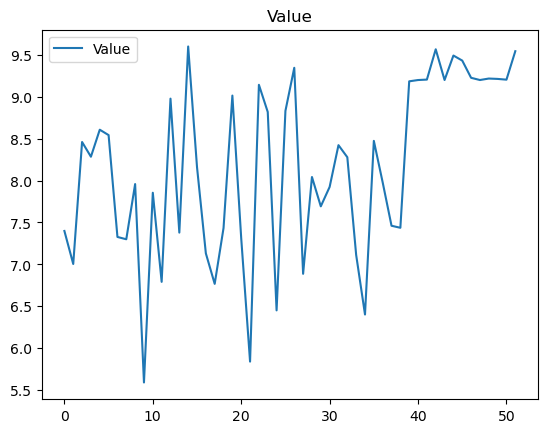

In [36]:
df = pd.DataFrame(outputs8, columns = ['Value'], index = range(outputs8.size))
plot = df.plot(title="Value")

In [37]:
kernel_best_Q7 =  RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1e2)) * WhiteKernel(noise_level=0.0001, noise_level_bounds=(0.0000000001, 10))

gp = GaussianProcessRegressor(
    kernel=kernel_best_Q7,
    n_restarts_optimizer=50,
    alpha=1e-4,
    normalize_y=True)

# Fit GP
gp.fit(X, y)

print("Optimized kernel:", gp.kernel_)

Optimized kernel: RBF(length_scale=43.9) * WhiteKernel(noise_level=1)


In [38]:
def hybrid_ucb(X, gp, kappa=0.5, alpha=0.5):
    mu, sigma = gp.predict(X, return_std=True)
    return alpha * mu + (1 - alpha) * (mu + kappa * sigma)

def optimize_acquisition_global(acquisition_func, gp, bounds, n_random=5000, n_local=10, **kwargs):
    dim = len(bounds)

    # Step 1: Random exploration
    X_random = np.random.uniform(
        [b[0] for b in bounds],
        [b[1] for b in bounds],
        size=(n_random, dim)
    )
    y_random = acquisition_func(X_random, gp, **kwargs)

    top_idx = np.argsort(y_random)[-n_local:]
    best_val = -np.inf
    best_x = None

    for idx in top_idx:
        x0 = X_random[idx]

        def objective(x):
            return -acquisition_func(x.reshape(1, -1), gp, **kwargs)

        res = minimize(objective, x0=x0, bounds=bounds, method="L-BFGS-B")
        if not res.success:
            continue

        val = -res.fun
        if val > best_val:
            best_val = val
            best_x = res.x

    return best_x

In [39]:
bounds = [(0, 1), (0, 1), (0, 1), (0 ,1), (0, 1), (0 , 1), (0 , 1), (0 , 1)]

# Optimize acquisition
next_point = optimize_acquisition_global(hybrid_ucb, gp, bounds, n_random=10000, n_local=5000, kappa=0.5, alpha=0.5)

print("Next query point (by UCB):", next_point)

Next query point (by UCB): [0.07702647 0.32083013 0.82553538 0.72998505 0.30616165 0.01009051
 0.67733718 0.07732703]
